# Anomaly Detection

## Isolation Forest

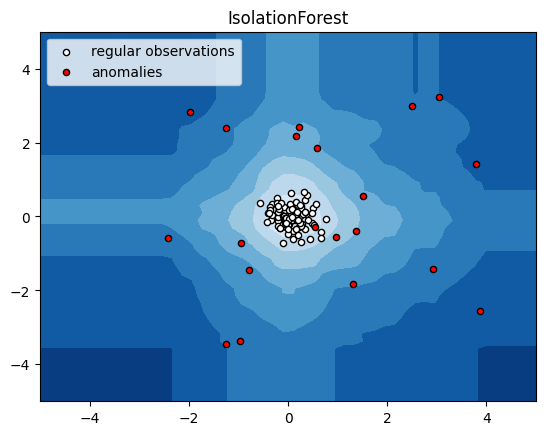

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# generate some data
np.random.seed(1)
X_inliers = 0.3 * np.random.randn(100, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

# run the model
clf = IsolationForest(contamination=0.1)
clf.fit(X)
y_pred = clf.predict(X)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_inliers[:, 0], X_inliers[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2], ["regular observations", "anomalies"], loc="upper left")
plt.show()

## Using Gaussian

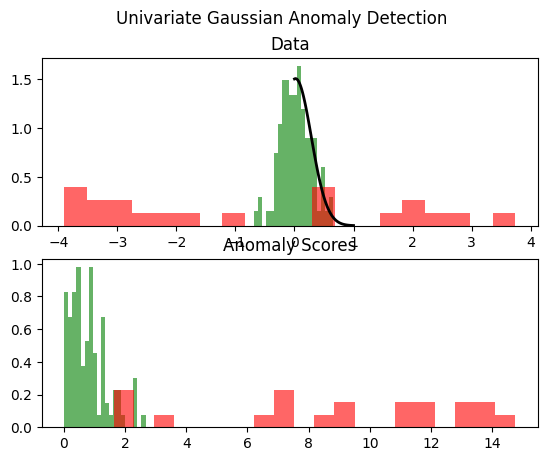

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some data
np.random.seed(1)
X_inliers = 0.3 * np.random.randn(100)
X_outliers = np.random.uniform(low=-4, high=4, size=(20,))
X = np.concatenate((X_inliers, X_outliers))

# Fit a univariate Gaussian model
mu, std = norm.fit(X_inliers)

# Predict the anomaly scores
anomaly_scores = np.abs(X - mu) / std

# Plot the data and the anomaly scores
fig, axs = plt.subplots(2, 1)
fig.suptitle('Univariate Gaussian Anomaly Detection')

# Plot data
axs[0].hist(X_inliers, bins=20, density=True, alpha=0.6, color='g')
axs[0].hist(X_outliers, bins=20, density=True, alpha=0.6, color='r')

# Calculate the pdf over a range of values
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[0].plot(x, p, 'k', linewidth=2)
axs[0].set_title('Data')

# Plot anomaly scores
axs[1].hist(anomaly_scores[:100], bins=20, density=True, alpha=0.6, color='g')
axs[1].hist(anomaly_scores[100:], bins=20, density=True, alpha=0.6, color='r')
axs[1].set_title('Anomaly Scores')

plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import f1_score, precision_score, recall_score

# Generate some data
np.random.seed(1)
X_inliers = 0.3 * np.random.randn(100)
X_outliers = np.random.uniform(low=-4, high=4, size=(20,))
X = np.concatenate((X_inliers, X_outliers))

# True labels
y_true = np.concatenate((np.ones(len(X_inliers)), -np.ones(len(X_outliers))))

# Fit a univariate Gaussian model
mu, std = norm.fit(X_inliers)

# Predict the anomaly scores
anomaly_scores = np.abs(X - mu) / std

# Choose a range of possible thresholds and compute F1 score for each
thresholds = np.linspace(np.min(anomaly_scores), np.max(anomaly_scores), 100)
f1_scores = []
for threshold in thresholds:
    y_pred = [1 if score < threshold else -1 for score in anomaly_scores]
    f1_scores.append(f1_score(y_true, y_pred))

# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Compute predictions using the optimal threshold
y_pred = [1 if score < threshold else -1 for score in anomaly_scores]

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Optimal threshold: {optimal_threshold}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


Optimal threshold: 2.6914772537897713
Precision: 0.8403361344537815
Recall: 1.0
F1 score: 0.91324200913242
